In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

**Reflect Tables into SQLAlchemy ORM**

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

**Exploratory Climate Analysis**

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
#Using inspector to find the name of the columns of the measurement table with their data types
columns =  inspector.get_columns("measurement")
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#The last date is given by:
last_date_of_prcp_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date_of_prcp_data)

('2017-08-23',)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_twelve_months)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
last_one_yr = session.query(Measurement.date, Measurement.prcp).filter(last_twelve_months <= Measurement.date).all()
last_one_yr

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_one_yr_df = pd.DataFrame(last_one_yr)
#Set index
last_one_yr_df.set_index('date', inplace = True)
last_one_yr_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [17]:
# Sort the dataframe by date
Sorted_df = last_one_yr_df.sort_values('date')
Sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


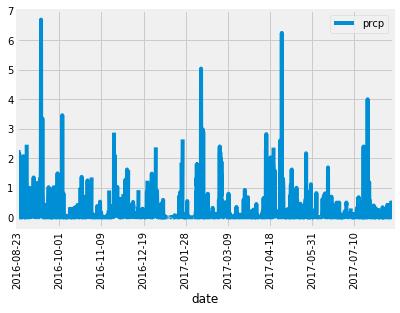

In [18]:
 #Use Pandas Plotting with Matplotlib to plot the data
Sorted_df.plot(rot = 90)
#plt.xticks('date', rotation = 'vertical')

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Sorted_df.describe(include = 'all')

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
#Lets get the name of the columns with the data types in them on the station table
columns =  inspector.get_columns("station")
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(func.count(Station.station)).all()
number_of_stations

[(9)]

In [22]:
 #What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
list_of_records = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
list_of_records

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp_obs = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).all()
highest_temp_obs

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [25]:
highest_temp_obs_df = pd.DataFrame(highest_temp_obs)
highest_temp_obs_df.set_index('station', inplace=True)
highest_temp_obs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


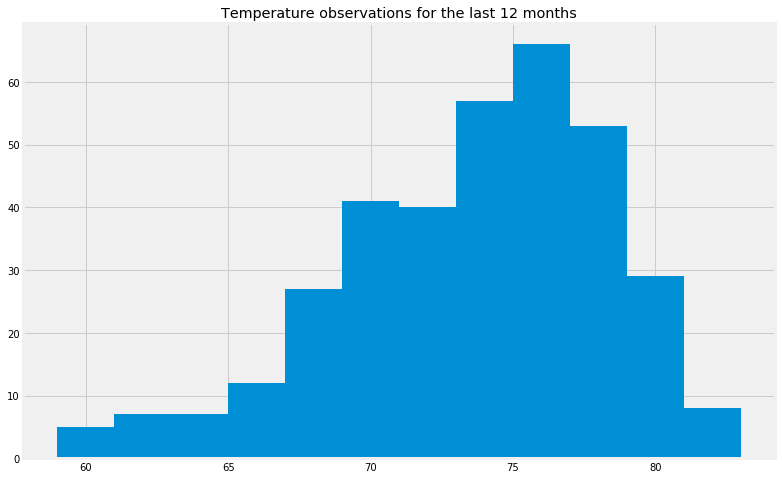

In [26]:
plt.figure(figsize=(12,8))
plt.hist(highest_temp_obs_df["tobs"], bins=12)
plt.title("Temperature observations for the last 12 months")

plt.show()

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
previous_year_trip = calc_temps('2016-08-28', '2017-03-05')

previous_year_trip

[(59.0, 73.46365914786968, 84.0)]

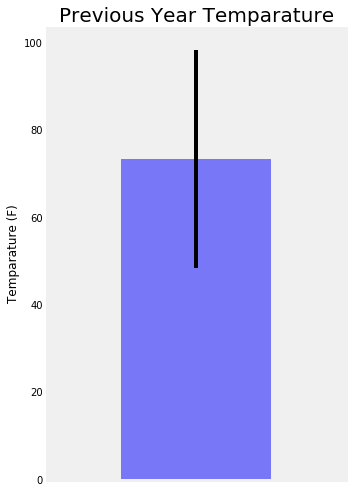

In [75]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
previous_year_trip_df = pd.DataFrame(previous_year_trip, columns=['Maximum Temp', 'Average Temp', 'Minimum Temp'])
average_temparature = previous_year_trip_df['Average Temp']
tmax_tmin = previous_year_trip_df.iloc[0]['Maximum Temp'] - previous_year_trip_df.iloc[0]['Minimum Temp']
average_temparature.plot(kind='bar', yerr=tmax_tmin, figsize=(5,7), alpha=0.5, color='blue')
plt.title("Previous Year Temparature", fontsize=20)
plt.ylabel("Temparature (F)")
plt.tight_layout()
plt.xticks([])
plt.grid()
plt.savefig("Previous year.png")
plt.show()

In [88]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Trip_start_date = '2016-08-28'
Trip_end_date = '2017-03-05'
sel = ([Station.station, Station.name,func.sum(Measurement.prcp),Station.latitude, Station.longitude,Station.elevation])

Total_rainfall = (session.query(*sel).filter(Station.station == Measurement.station).\
                 filter(Measurement.date >=Trip_start_date).filter(Measurement.date <= Trip_end_date).\
                 group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all())
                   
        
for i in Total_rainfall: 
    print(i)
   


('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 93.53999999999998, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 35.77, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 24.809999999999985, 21.4234, -157.8015, 14.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 20.180000000000003, 21.33556, -157.71139, 19.5)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 16.919999999999995, 21.5213, -157.8374, 7.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 12.099999999999994, 21.2716, -157.8168, 3.0)
('USC00517948', 'PEARL CITY, HI US', 4.36, 21.3934, -157.9751, 11.9)
